In [269]:
# importing libraries 
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import label_binarize
from sklearn import metrics


In [270]:
# load data 
df = pd.read_csv('MergeElection2022_Faits_Securite.csv', sep = ';', encoding='ISO-8859-1')

# Display the first few rows 
df.head()

,code_departement,faits,tauxpourmille,DLF,EELV,LFI,LO,LR,LREM,NPA,...,PS,RN,ReconuÃªte,RÃ©sistons,abstentions,blancs,nuls,gagnant,nom_departement,total_population
0,01,24042.0,40.0,8998,15843,57832,1658,17572,92206,2172,...,5644,86755,27530,10876,97541,5641,1903,LREM,Ain,671937.0
1,02,22815.0,46.4,5790,7074,41172,2038,10920,58721,2118,...,2983,104342,18266,6468,101089,3767,2828,RN,Aisne,522791.0
2,03,12755.0,39.5,4216,5982,31013,1359,10319,49706,1503,...,3280,50315,12361,7782,58497,3749,1790,RN,Allier,332443.0
3,04,7983.0,48.9,2504,3957,21856,505,3834,20800,865,...,1396,26010,7926,4309,29290,1478,624,RN,Alpes-de-Haute-Provence,166654.0
4,05,6136.0,43.6,2142,5013,19718,428,4511,20507,801,...,1459,19696,6164,3871,25357,1395,532,LREM,Hautes-Alpes,139942.0


In [271]:
df.columns

Index(['code_departement', 'faits', 'tauxpourmille', 'DLF', 'EELV', 'LFI',
       'LO', 'LR', 'LREM', 'NPA', 'PCF', 'PS', 'RN', 'ReconuÃªte',
       'RÃ©sistons', 'abstentions', 'blancs', 'nuls', 'gagnant',
       'nom_departement', 'total_population'],
      dtype='object')

In [272]:
# Encoding categorical variables
# transforme les variables catégorielles en nombre car c'est nécessaire pour la plus part des algorithme de ML étant donnée qu'ils requièrent des entrés numériques 

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

In [273]:
# preparation de l'ensemble de données 
# on divise les donnée en features (X) and target (y) 
X = df.drop('gagnant', axis=1)  
y = df['gagnant']

In [274]:
# splitting data
# divise les données en ensemble de test et d'entrainement
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [275]:
# MODEL TRAINING 

In [276]:
##
##  Decision Tree With Gini Criterion
## 
### on commence par créer et entrainer le classificateur d'arbre de decision en utilisant les critéres Gini 

In [277]:
# Create and Train the model 
### on commence par créer et entrainer le classificateur d'arbre de decision en utilisant les critéres Gini 

model = DecisionTreeClassifier(criterion='gini', splitter = 'best', random_state= 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [278]:
# using cross validation for more stable estimates 
accuracies = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print("Cross-Validated Accuracies:", accuracies)

Cross-Validated Accuracies: [0.57142857 0.52380952 0.66666667 0.6        0.2       ]


In [279]:
# Predictions
# on évalue le modele sur l'ensemble de test, en utulisant plusieurs métrics 
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Handling multiclass metrics calculations
accuracy = metrics.accuracy_score(y_test, y_test_pred)
f1 = metrics.f1_score(y_test, y_test_pred, average='macro', zero_division=0)  # Handle classes with no predictions
precision = metrics.precision_score(y_test, y_test_pred, average='macro', zero_division=0)

# Printing results
print("Accuracy = %f" % accuracy)
print("F1 Score = %f" % f1)
print("Precision Score = %f" % precision)

Accuracy = 0.619048
F1 Score = 0.563889
Precision Score = 0.555556


In [280]:
## 
## Decision Tree With Entropy Criterion
##

In [281]:
# Initialize the DecisionTreeClassifier with entropy criterion.
model2 = DecisionTreeClassifier(criterion='entropy', splitter='best', random_state=42)
model2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [282]:
# using cross validation for more stable estimates 
accuracies2= cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print("Cross-Validated Accuracies with the second model:", accuracies2)

Cross-Validated Accuracies with the second model: [0.57142857 0.52380952 0.66666667 0.6        0.2       ]


In [283]:
# Make predictions with model2 on the test data.
y_test_pred2 = model2.predict(X_test)

# Calculate the performance metrics for model2 on the test data.
accuracy2 = metrics.accuracy_score(y_test, y_test_pred2)
f1_score2 = metrics.f1_score(y_test, y_test_pred2, average='macro', zero_division=0)
precision_score2 = metrics.precision_score(y_test, y_test_pred2, average='macro', zero_division=0)

# Print out the metrics for model2.
print("Accuracy = %f" % accuracy2)
print("F1 Score = %f" % f1_score2)
print("Precision Score = %f" % precision_score2)


Accuracy = 0.666667
F1 Score = 0.591398
Precision Score = 0.543860


In [284]:
## FILTER THE DATA 
## FOR THE GIRONDE DEPARTEMENT (33)

In [285]:
# Extracting unique department codes
unique_departments = df['code_departement'].unique()

# Convert to list 
unique_departments_list = list(unique_departments)
print("Unique Department Codes:", unique_departments_list)


Unique Department Codes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102]


In [286]:
# Create and fit LabelEncoder with all possible categories
dept_encoder = LabelEncoder()
dept_encoder.fit(unique_departments_list)  

# Transform 'code_departement' in the dataset
df['code_departement'] = dept_encoder.transform(df['code_departement'].astype(str))


In [287]:
## filtering the data for Gironde departement only 
gironde_df = df[df['code_departement'] == dept_encoder.transform(['33'])[0]]


In [288]:
try:
    X_gironde = df[df['code_departement'] == dept_encoder.transform(['33'])[0]]
except ValueError as e:
    print("Unseen label found:", e)

In [289]:
# Prepare features for prediction
X_gironde = gironde_df.drop('gagnant', axis=1) 
y_gironde = gironde_df['gagnant']

In [290]:
## prediction using the trained models :

In [291]:
# using the gini criterion model 
y_gironde_pred_gini = model.predict_proba(X_gironde)

# using the Entropy Criterion model 
y_gironde_pred_entropy = model2.predict_proba(X_gironde)

In [292]:
# print predictions 
print("Predicted Labels with gini:", y_gironde_pred_gini)
print("Predicted Labels with entropy", y_gironde_pred_entropy)

Predicted Labels with gini: [[0. 0. 1.]]
Predicted Labels with entropy [[0.  0.6 0.4]]


In [293]:
def print_predicted_votes(probs, labels):
    sums = probs.sum(axis=0)  # Sum probabilities for each class
    party_votes = {label: vote for label, vote in zip(labels, sums)}
    return party_votes

labels = [ 'LFI', 'LREM', 'RN']
predicted_votes = print_predicted_votes(y_gironde_pred_gini, labels)

# Printing predicted votes for each party
for party, votes in predicted_votes.items():
    print(f"{party}: {votes:.2f} votes")


LFI: 0.00 votes
LREM: 0.00 votes
RN: 1.00 votes


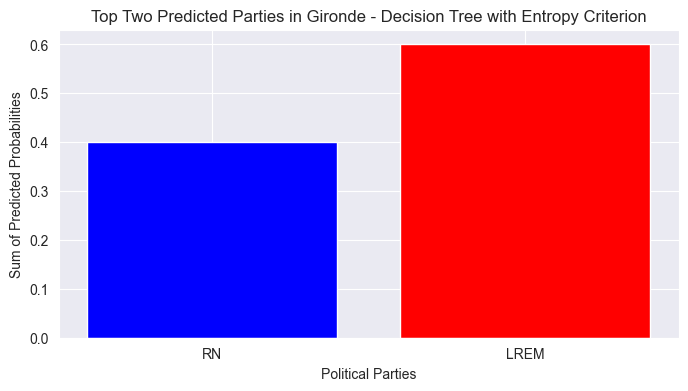

In [294]:
def plot_top_predictions(probs, model_name):
    labels = ['LFI','LREM', 'RN']
    sums = probs.sum(axis=0)  # Somme des probabilités pour chaque classe
    top_two_idx = np.argsort(sums)[-2:]  # Indices des deux plus grands
    top_labels = [labels[i] for i in top_two_idx]
    top_sums = [sums[i] for i in top_two_idx]
    colors = ['blue', 'red']  # Couleurs pour les deux partis principaux

    plt.figure(figsize=(8, 4))
    plt.bar(top_labels, top_sums, color=colors)
    plt.title(f'Top Two Predicted Parties in Gironde - {model_name}')
    plt.xlabel('Political Parties')
    plt.ylabel('Sum of Predicted Probabilities')
    plt.show()

plot_top_predictions(y_gironde_pred_entropy, 'Decision Tree with Entropy Criterion')

In [295]:
# import de GridSearchCv et d'autres modules nécessaire
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [296]:
# définir les hyperparametres a tester : 
# pour un arbre de decision les hyperparametres sont : 
# criterion : le critères de mesure de la qualité d'un split 'gini' ou 'entropy' 
# max depth : la profondeur maximal de l'arbre
# min sample split : le nombre min de donnée requises pour diviser un noeud interne 
# min samples leaf : le nombre min d'échantillons requis pour etre a un feuille 

In [297]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}


In [298]:
# configurer notre gridsearchCV avec le model 
model = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)


In [299]:
# entrainement avec gridsearchcv : 
# on entraine GridSearch sur les donnée d'apprentissage
# c'est une étape qui peut prendre un petit peu de temps, car il va entrainer un modèle pour chaque combinaison de parametres a traver tous les plis de la validation croisée
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='accuracy', verbose=1)

In [300]:
# apres l'entrainement, on a le meilleur parametre a utiliser et le meilleur modèle trouver pour faire nos prediction 
print("Meilleurs paramètres:", grid_search.best_params_)
best_model = grid_search.best_estimator_

y_test_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)


Meilleurs paramètres: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [301]:
# evaluer le meilleur modèle 
from sklearn.metrics import accuracy_score, classification_report

print("Précision:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


Précision: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.89      0.67      0.76        12
           2       0.50      0.86      0.63         7

    accuracy                           0.67        21
   macro avg       0.46      0.51      0.46        21
weighted avg       0.67      0.67      0.65        21


C:\Users\pikat\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pikat\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pikat\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
